# Supervised Learning
The idea of this notebook is using different learning machines in order to see how good are timbral features to describe musical genres. 
The data used is extracted from the GTZAN dataset: mfcc using gaussian windows with 60% overlapping. The features are the mean of the mfcc and the flattened covariance matrix for a total of 250 features

In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from numpy import interp
from sklearn import preprocessing,manifold
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder, label_binarize
from sklearn.model_selection import train_test_split, StratifiedKFold
#from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, auc

In [2]:
data = pd.read_csv("mfccToy.csv",header=None)
data = pd.DataFrame(data).to_numpy()
data.shape

(300, 211)

Data preprocessing: Cleaning NaN and Normalizing without imposing a distribution

In [4]:
data = data[~np.isnan(data).any(axis=1)]
data.shape

target = data[:,-1]
target2 = np.expand_dims(target,1)
X = data[:,:-1]
X_norm = (X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
x= np.concatenate((X_norm,target2),axis=1)

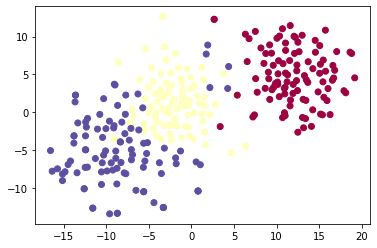

In [5]:
Xe= manifold.TSNE( metric='euclidean', method='barnes_hut').fit_transform(X_norm)
plt.scatter(Xe[:, 0], Xe[:, 1], c=target, cmap="Spectral")
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, target, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

## Classifiers

### Logistic Regression

In [7]:
logistic = LogisticRegression(max_iter = 100000)
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
print('Training error', np.sum(logistic.predict(X_train) == y_train)/len(y_train))
print('Test error: ', np.sum(logistic.predict(X_test) == y_test)/len(y_test))

Training error 0.9895833333333334
Test error:  0.9333333333333333


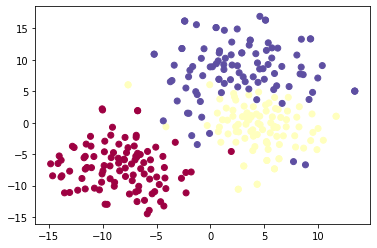

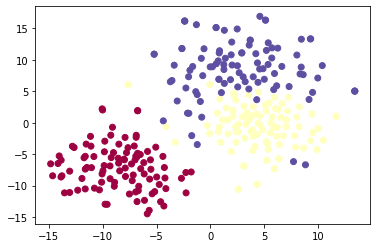

Test error:  0.9866666666666667
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 2. 3. 3. 3. 2.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [31]:
pred = logistic.predict(X_norm)
Xe= manifold.TSNE( metric='euclidean', method='barnes_hut').fit_transform(X_norm)
plt.scatter(Xe[:, 0], Xe[:, 1], c=target, cmap="Spectral")
plt.show()
plt.scatter(Xe[:, 0], Xe[:, 1], c=pred, cmap="Spectral")
plt.show()
print('Test error: ', np.sum(logistic.predict(X_norm) == target)/len(target))
print(pred)
print(target)

## Decision Tree

In [10]:
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
print('Training error', np.sum(clf.predict(X_train) == y_train)/len(y_train))
print('Test error: ', np.sum(clf.predict(X_test) == y_test)/len(y_test))

Training error 1.0
Test error:  0.8333333333333334


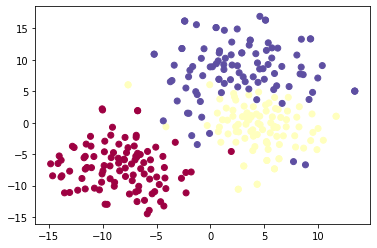

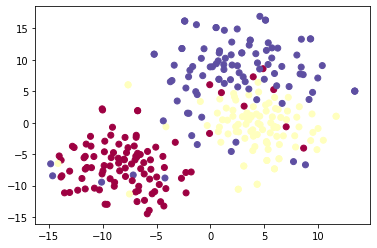

Test error:  0.9333333333333333


In [37]:
pred = clf.predict(X_norm)
plt.scatter(Xe[:, 0], Xe[:, 1], c=target, cmap="Spectral")
plt.show()
plt.scatter(Xe[:, 0], Xe[:, 1], c=pred, cmap="Spectral")
plt.show()
print('Test error: ', np.sum(clf.predict(X_norm) == target)/len(target))

## Support vector machine

Kernels:
* Lineal
* Polynomial
* Radial base

In [41]:
clf2 = svm.SVC(kernel = 'rbf')
clf2.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [42]:
print('Training error', np.sum(clf2.predict(X_train) == y_train)/len(y_train))
print('Test error: ', np.sum(clf2.predict(X_test) == y_test)/len(y_test))

Training error 0.6197916666666666
Test error:  0.6


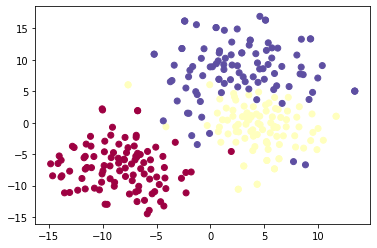

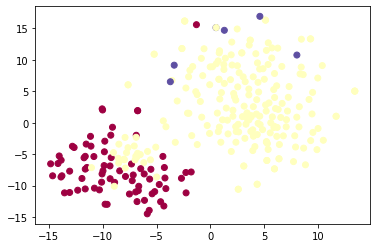

Test error:  0.6


In [43]:
pred = clf2.predict(X_norm)
plt.scatter(Xe[:, 0], Xe[:, 1], c=target, cmap="Spectral")
plt.show()
plt.scatter(Xe[:, 0], Xe[:, 1], c=pred, cmap="Spectral")
plt.show()
print('Test error: ', np.sum(clf2.predict(X_norm) == target)/len(target))

In [44]:
clf2 = svm.SVC(kernel = 'linear')
clf2.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
print('Training error', np.sum(clf2.predict(X_train) == y_train)/len(y_train))
print('Test error: ', np.sum(clf2.predict(X_test) == y_test)/len(y_test))

Training error 0.9947916666666666
Test error:  0.95


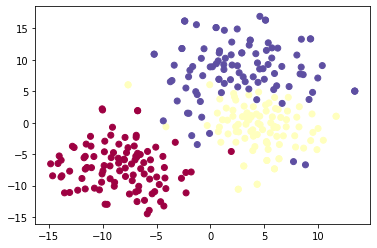

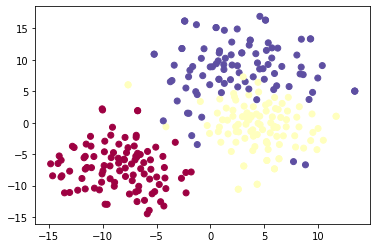

Test error:  0.9766666666666667


In [47]:
pred = clf2.predict(X_norm)
plt.scatter(Xe[:, 0], Xe[:, 1], c=target, cmap="Spectral")
plt.show()
plt.scatter(Xe[:, 0], Xe[:, 1], c=pred, cmap="Spectral")
plt.show()
print('Test error: ', np.sum(clf2.predict(X_norm) == target)/len(target))

In [48]:
clf2 = svm.SVC(kernel = 'poly')
clf2.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [49]:
print('Training error', np.sum(clf2.predict(X_train) == y_train)/len(y_train))
print('Test error: ', np.sum(clf2.predict(X_test) == y_test)/len(y_test))

Training error 0.5
Test error:  0.5166666666666667


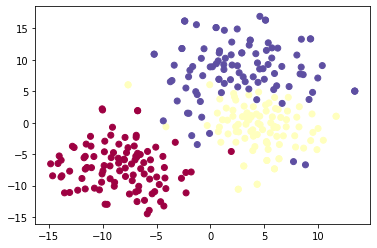

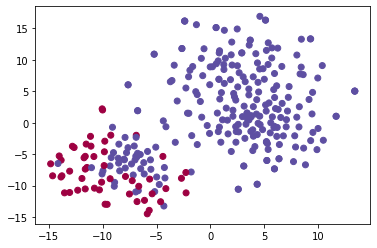

Test error:  0.5033333333333333


In [50]:
pred = clf2.predict(X_norm)
plt.scatter(Xe[:, 0], Xe[:, 1], c=target, cmap="Spectral")
plt.show()
plt.scatter(Xe[:, 0], Xe[:, 1], c=pred, cmap="Spectral")
plt.show()
print('Test error: ', np.sum(clf2.predict(X_norm) == target)/len(target))

## Multilayer Perceptron

* Hidden layers: $L = 1,...,3$
* Number of neurons in the hidden layers: $l_i = 1,2,3$
* Learning rate: 0.2,0.5,0.9

In [18]:
learning_rate = [0.2,0.5,0.9]
nn =  MLPClassifier(hidden_layer_sizes=(1,1,1), learning_rate_init=.2)
nn.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1, 1, 1), learning_rate='constant',
              learning_rate_init=0.2, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [54]:
learning_rate, activation = 0.2, 'relu'
error = 0
# Choose best performance with combinations of activations and learning rate
for act in ['relu','tanh','logistic']:
    for lr in [0.2,0.5,0.9]:
        nn =  MLPClassifier(hidden_layer_sizes=(3,3,3),activation=act, learning_rate_init=lr)
        nn.fit(X_train,y_train)
        err = np.sum(nn.predict(X_val) == y_val)/len(y_val)
        print(act,lr,err)
        if(err > error):
            learning_rate, activation, error = lr,act,err
nn =  MLPClassifier(hidden_layer_sizes=(3,3,3),activation=activation, learning_rate_init=learning_rate)
nn.fit(X_train,y_train)

relu 0.2 0.3125
relu 0.5 0.3333333333333333
relu 0.9 0.3333333333333333
tanh 0.2 0.3125
tanh 0.5 0.3541666666666667
tanh 0.9 0.3541666666666667
logistic 0.2 0.3333333333333333
logistic 0.5 0.3541666666666667
logistic 0.9 0.3333333333333333


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 3, 3), learning_rate='constant',
              learning_rate_init=0.5, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [56]:
print('Training error', np.sum(nn.predict(X_train) == y_train)/len(y_train))
print('Test error: ', np.sum(nn.predict(X_test) == y_test)/len(y_test))

Training error 0.3385416666666667
Test error:  0.3333333333333333


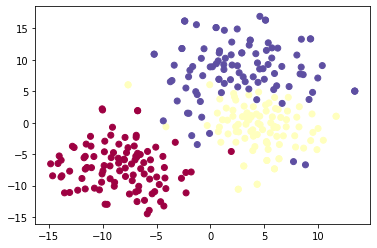

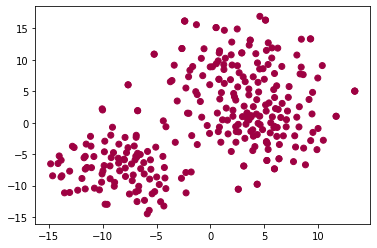

Test error:  0.3333333333333333


In [57]:
pred = nn.predict(X_norm)
plt.scatter(Xe[:, 0], Xe[:, 1], c=target, cmap="Spectral")
plt.show()
plt.scatter(Xe[:, 0], Xe[:, 1], c=pred, cmap="Spectral")
plt.show()
print('Test error: ', np.sum(nn.predict(X_norm) == target)/len(target))